# Kernel SVM

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the dataset
dataset = pd.read_csv('Data/clean_df.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
#Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10562   457]
 [ 1425  1661]]


0.8665721375398795

In [10]:
# model matrics

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

# classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

# precision score

precision = TP / float(TP + FP)

# Recall

recall = TP / float(TP + FN)

# True Positive rate

true_positive_rate = TP / float(TP + FN)

# False Positive rate

false_positive_rate = FP / float(FP + TN)

# Specificity

specificity = TN / (TN + FP)

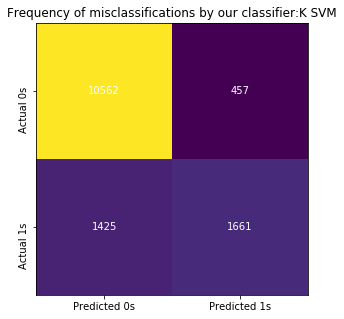

In [16]:
#plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.title('Frequency of misclassifications by our classifier:K SVM',wrap=True)
plt.yticks(rotation='vertical')
plt.savefig('Output/CMKsvm.png')
plt.show()

In [8]:
# compare training and test accuracy for overfitting
training_accuracy = classifier.score(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8740399385560675
Testing Data Score: 0.8665721375398795


In [12]:
df = pd.DataFrame({"Model Name": "Kernal SVM",
              "Training Accuracy": [training_accuracy],
              "Classification Accuracy":[classification_accuracy],
              "Classification Error":[classification_error],
              "Precision":[precision],
              "Recall":[recall],
              "True Positive Rate":[true_positive_rate],
              "False Positive Rate":[false_positive_rate],
              "Specificity":[specificity]              
             })
df

,Model Name,Training Accuracy,Classification Accuracy,Classification Error,Precision,Recall,True Positive Rate,False Positive Rate,Specificity
0,Kernal SVM,0.87404,0.866572,0.133428,0.958526,0.881121,0.881121,0.21577,0.78423


In [13]:
import os
# if file does not exist write header 
if not os.path.isfile('Data/model.csv'):
    df.to_csv('Data/model.csv', header='column_names')
else: # else it exists so append without writing the header
    df.to_csv('Data/model.csv', mode='a', header=False, index=False)